In [94]:
pip install pandas pyreadstat

In [95]:
import pandas as pd
import pyreadstat

archivo1 = "04_EGRESADOS_CAP300.SAV"
archivo2 = "06_EGRESADOS_CAP400.SAV"


df_pred, meta300 = pyreadstat.read_sav(archivo1, encoding='latin1')
df_target, meta300 = pyreadstat.read_sav(archivo2, encoding='latin1')

In [96]:
print(df_target['CAP400P406'].isna().sum())

1296


In [97]:
import pandas as pd
import pyreadstat

archivo1 = "04_EGRESADOS_CAP300.SAV"
archivo2 = "06_EGRESADOS_CAP400.SAV"

# 1. Cargar los archivos
df_pred, meta300 = pyreadstat.read_sav(archivo1, encoding='latin1')
df_target, meta400 = pyreadstat.read_sav(archivo2, encoding='latin1')

df_merged = pd.merge(
    df_pred,
    df_target,
    on='SELECT',
    how='inner',
    suffixes=('_300', '_400')
)

print(f"Dimensiones unidas: {df_merged.shape}")
print(df_merged.head())

Dimensiones unidas: (10564, 350)
   SELECT  CAP300P301  CAP300P302  CAP300P303  CAP300P304  CAP300P305  \
0     1.0         2.0         2.0         2.0         NaN         2.0   
1     2.0         2.0         2.0         2.0         NaN         2.0   
2     3.0         1.0         1.0         2.0         NaN         1.0   
3     5.0         2.0         2.0         2.0         NaN         2.0   
4     6.0         1.0         1.0         2.0         NaN         1.0   

   CAP300P306  CAP300P307  CAP300P308  CAP300P309_1  ...  campo_carr  \
0         2.0         NaN      2005.0           1.0  ...         5.0   
1         2.0         NaN      2005.0           1.0  ...         3.0   
2         2.0         NaN      2006.0           2.0  ...         3.0   
3         2.0         NaN      2005.0           1.0  ...         7.0   
4         2.0         NaN      2002.0           1.0  ...         1.0   

   Cod_Campo_educacion  COD_CAMP_EDUC  \
0                    5            5.0   
1            

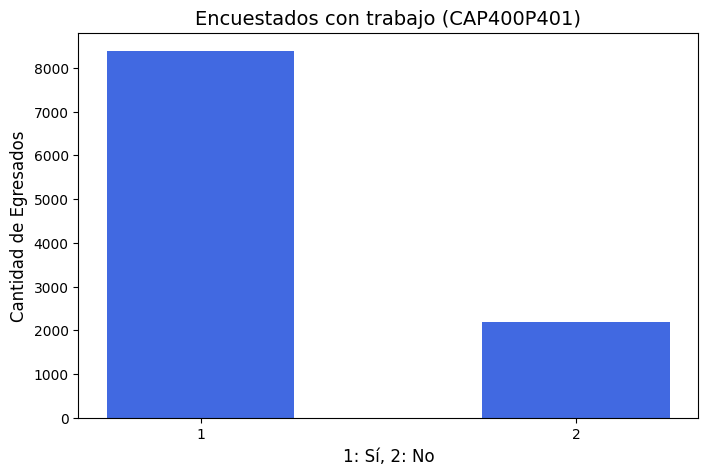

In [98]:
import matplotlib.pyplot as plt

# Contar valores
counts = df_target['CAP400P401'].value_counts().sort_index()
valores = counts.index
frecuencias = counts.values

# Crear histograma
plt.figure(figsize=(8,5))
plt.bar(valores, frecuencias, color='royalblue', width=0.5)

# Etiquetas y título
plt.title('Encuestados con trabajo (CAP400P401)', fontsize=14)
plt.xlabel("1: Sí, 2: No", fontsize=12)
plt.ylabel("Cantidad de Egresados", fontsize=12)

plt.xticks(valores)

plt.show()



In [99]:
import pandas as pd
import numpy as np


condiciones = [
    (df_merged['CAP400P401'] == 2),                         # 1. No trabaja = 0
    (df_merged['CAP400P401'] == 1) & (df_merged['CAP400P406'] == 2), # 2. Trabaja pero NO relacionado = 1
    (df_merged['CAP400P401'] == 1) & (df_merged['CAP400P406'] == 1)  # 3. Trabaja y SI relacionado = 2
    ]

valores = [0, 1, 2]

df_merged['TRABAJO_RELACIONADO'] = np.select(condiciones, valores, default=np.nan)

print(df_merged[['CAP400P401', 'CAP400P406', 'TRABAJO_RELACIONADO']].head())

   CAP400P401  CAP400P406  TRABAJO_RELACIONADO
0         2.0         NaN                  0.0
1         1.0         1.0                  2.0
2         1.0         1.0                  2.0
3         1.0         1.0                  2.0
4         1.0         1.0                  2.0


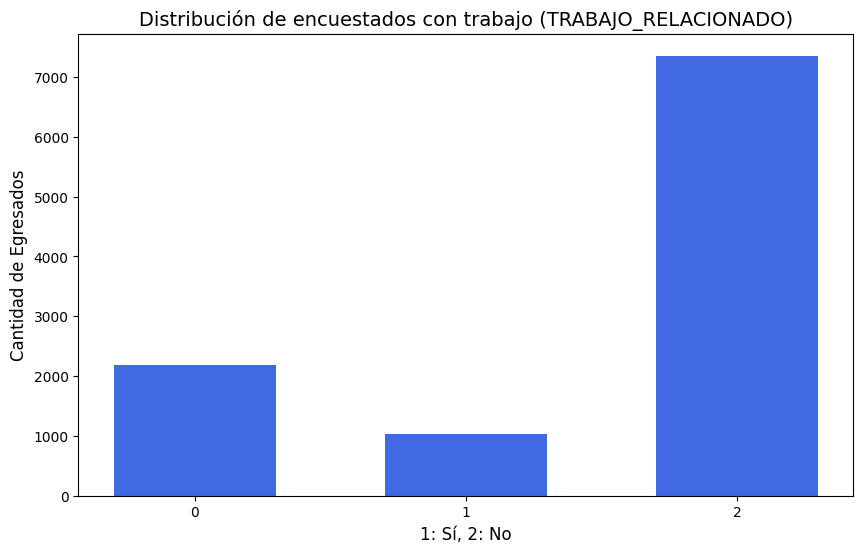

In [100]:
import matplotlib.pyplot as plt


counts = df_merged['TRABAJO_RELACIONADO'].dropna().value_counts().sort_index()

valores = counts.index
frecuencias = counts.values

plt.figure(figsize=(10, 6))
plt.bar(valores, frecuencias, color='royalblue', width=0.6)


plt.title('Distribución de encuestados con trabajo (TRABAJO_RELACIONADO)', fontsize=14)
plt.xlabel("1: Sí, 2: No", fontsize=12)
plt.ylabel("Cantidad de Egresados", fontsize=12)


plt.xticks(valores)

plt.show()



In [101]:
from sklearn.utils import resample

conteo = df_merged['TRABAJO_RELACIONADO'].value_counts()
min_samples = conteo.min()

df_class_0 = df_merged[df_merged['TRABAJO_RELACIONADO'] == 0]
df_class_1 = df_merged[df_merged['TRABAJO_RELACIONADO']== 1]
df_class_2 = df_merged[df_merged['TRABAJO_RELACIONADO'] == 2]

df_class_0_down = resample(df_class_0,
                           replace=False,
                           n_samples=min_samples,
                           random_state=42)

df_class_1_down = resample(df_class_1,
                           replace=False,
                           n_samples=min_samples,
                           random_state=42)

df_class_2_down = resample(df_class_2,
                           replace=False,
                           n_samples=min_samples,
                           random_state=42)


df_balanceado = pd.concat([df_class_0_down, df_class_1_down, df_class_2_down])


In [102]:
df_balanceado.columns


Index(['SELECT', 'CAP300P301', 'CAP300P302', 'CAP300P303', 'CAP300P304',
       'CAP300P305', 'CAP300P306', 'CAP300P307', 'CAP300P308', 'CAP300P309_1',
       ...
       'Cod_Campo_educacion', 'COD_CAMP_EDUC', 'Campo_educacion', 'CAMP_EDUC',
       'Cod_Campo_especifico', 'COD_CAMP_ESPEC', 'Campo_especifico',
       'CAMP_ESPEC', 'F_EXPANS_400', 'TRABAJO_RELACIONADO'],
      dtype='object', length=351)

In [103]:
# 1. Variables importantes en el diccionario de variables descriptivas

mapa_nombres = {
    "SELECT":                     "ID_Egresado",


    "SELECT_UNI":                "Universidad",
    "SELECT_UNI_GESTION":        "Tipo_Gestion_Univ",
    "CAP300P314":                "Motivo_Elegir_Universidad",
    "CAP300P315":                "Motivo_Elegir_Carrera",

    "CAP300P301":                "Gestion_Colegio_Inicial",
    "CAP300P302":                "Gestion_Colegio_Primaria",
    "CAP300P305":                "Gestion_Colegio_Secundaria",
    "CAP300P309_1":              "OrienVoc_Prueba",
    "CAP300P309_2":              "OrienVoc_Charlas",
    "CAP300P309_3":              "OrienVoc_Ferias",
    "CAP300P309_4":              "OrienVoc_Simulacros",

    "CAP300P310_1":              "PreU_BuscoTrabajo",
    "CAP300P310_2":              "PreU_TrabajoRemunerado",
    "CAP300P310_3":              "PreU_Academia",
    "CAP300P310_4":              "PreU_Instituto",
    "CAP300P310_5":              "PreU_TrabajoNoRem",
    "CAP300P310_6":              "PreU_Otro",


    "CAP300P316":                 "Interrumpio_Estudios",
    "CAP300P317":                 "Semestres_Interrumpidos",
    "CAP300P318_1":               "Interrup_FaltaDinero",
    "CAP300P318_2":               "Interrup_Trabajo",
    "CAP300P318_3":               "Interrup_Enfermedad",
    "CAP300P318_4":               "Interrup_Familia",
    "CAP300P318_5":               "Interrup_NoGusto",
    "CAP300P318_6":               "Interrup_Suspension",
    "CAP300P318_7":               "Interrup_CambioDomic",
    "CAP300P318_8":               "Interrup_Otro",


    "CAP300P322":                 "Intercambio_Internacional",



    "CAP300P324":                 "Pertenece_Cuadro_Merito",
    "CAP300P324A":                "Puesto_Merito",


    "CAP300P325":                 "Tiene_Bachiller",
    "CAP300P330":                 "Tiene_Titulo",
    "CAP300P331":                 "Modalidad_Titulacion",
    "CAP300P335":                 "Tiene_Postgrado",
    "CAP300P346":                 "Lugar_Postgrado",


    "CAP300P319_1":               "Financiamiento_Trabajo",
    "CAP300P319_2":               "Financiamiento_Familia",
    "CAP300P319_3":               "Financiamiento_BecaUniv",
    "CAP300P319_4":               "Financiamiento_PRONABEC",
    "CAP300P319_5":               "Financiamiento_Prestamo",
    "CAP300P319_6":               "Financiamiento_Otro",


    "CAP300P347":                 "Uso_Oficina_Laboral",
    "CAP300P348":                 "Uso_Bolsa_Trabajo",


    "CAP300P349":                 "Realizo_Practicas",
    "CAP300P350":                 "Practicas_Gestionadas_Univ",
    "CAP300P351":                 "Cantidad_Practicas",
    "CAP300P352":                 "Meses_Experiencia_Practicas",
    "CAP300P353":                 "Tamano_Empresa_Practicas"
}


df_balanceado.rename(columns=mapa_nombres, inplace=True)

cols_deseadas = list(mapa_nombres.values())
if 'TRABAJO_RELACIONADO' in df_balanceado.columns:
    cols_deseadas.append('TRABAJO_RELACIONADO')

cols_existentes = [col for col in cols_deseadas if col in df_balanceado.columns]
df_final = df_balanceado[cols_existentes].copy()

print(f"Dimensiones de df_final: {df_final.shape}")
print("\nColumnas en df_final:")
print(df_final.columns.tolist())

Dimensiones de df_final: (3093, 49)

Columnas en df_final:
['ID_Egresado', 'Universidad', 'Tipo_Gestion_Univ', 'Motivo_Elegir_Universidad', 'Motivo_Elegir_Carrera', 'Gestion_Colegio_Inicial', 'Gestion_Colegio_Primaria', 'Gestion_Colegio_Secundaria', 'OrienVoc_Prueba', 'OrienVoc_Charlas', 'OrienVoc_Ferias', 'OrienVoc_Simulacros', 'PreU_BuscoTrabajo', 'PreU_TrabajoRemunerado', 'PreU_Academia', 'PreU_Instituto', 'PreU_TrabajoNoRem', 'PreU_Otro', 'Interrumpio_Estudios', 'Semestres_Interrumpidos', 'Interrup_FaltaDinero', 'Interrup_Trabajo', 'Interrup_Enfermedad', 'Interrup_Familia', 'Interrup_NoGusto', 'Interrup_Suspension', 'Interrup_CambioDomic', 'Interrup_Otro', 'Intercambio_Internacional', 'Pertenece_Cuadro_Merito', 'Puesto_Merito', 'Tiene_Bachiller', 'Tiene_Titulo', 'Modalidad_Titulacion', 'Tiene_Postgrado', 'Financiamiento_Trabajo', 'Financiamiento_Familia', 'Financiamiento_BecaUniv', 'Financiamiento_PRONABEC', 'Financiamiento_Prestamo', 'Financiamiento_Otro', 'Uso_Oficina_Laboral', '

In [104]:
df_final.head()

,ID_Egresado,Universidad,Tipo_Gestion_Univ,Motivo_Elegir_Universidad,Motivo_Elegir_Carrera,Gestion_Colegio_Inicial,Gestion_Colegio_Primaria,Gestion_Colegio_Secundaria,OrienVoc_Prueba,OrienVoc_Charlas,...,Financiamiento_Prestamo,Financiamiento_Otro,Uso_Oficina_Laboral,Uso_Bolsa_Trabajo,Realizo_Practicas,Practicas_Gestionadas_Univ,Cantidad_Practicas,Meses_Experiencia_Practicas,Tamano_Empresa_Practicas,TRABAJO_RELACIONADO
1688,1705.0,U0014,2.0,5.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,24.0,1.0,0.0
2701,2728.0,U0091,2.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,3.0,2.0,1.0,2.0,1.0,6.0,4.0,0.0
6771,6831.0,U0021,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,9.0,4.0,0.0
6531,6590.0,U0053,2.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,12.0,4.0,0.0
2881,2909.0,U0019,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,...,2.0,2.0,3.0,3.0,1.0,2.0,2.0,10.0,5.0,0.0


In [105]:
print(df_final.isna().sum())

ID_Egresado                       0
Universidad                       0
Tipo_Gestion_Univ                 0
Motivo_Elegir_Universidad         0
Motivo_Elegir_Carrera             0
Gestion_Colegio_Inicial           0
Gestion_Colegio_Primaria          0
Gestion_Colegio_Secundaria        0
OrienVoc_Prueba                   0
OrienVoc_Charlas                  0
OrienVoc_Ferias                   0
OrienVoc_Simulacros               0
PreU_BuscoTrabajo                 0
PreU_TrabajoRemunerado            0
PreU_Academia                     0
PreU_Instituto                    0
PreU_TrabajoNoRem                 0
PreU_Otro                         0
Interrumpio_Estudios              0
Semestres_Interrumpidos        2461
Interrup_FaltaDinero           2461
Interrup_Trabajo               2461
Interrup_Enfermedad            2461
Interrup_Familia               2461
Interrup_NoGusto               2461
Interrup_Suspension            2461
Interrup_CambioDomic           2461
Interrup_Otro               

In [106]:
#Convertir columnas a Float32

cols_float = df_final.select_dtypes(include=['float64','int64']).columns

df_final[cols_float] = df_final[cols_float].round().astype('float32')
print("Nuevos tipos de datos:")
print(df_final[cols_float].dtypes)

Nuevos tipos de datos:
ID_Egresado                    float32
Tipo_Gestion_Univ              float32
Motivo_Elegir_Universidad      float32
Motivo_Elegir_Carrera          float32
Gestion_Colegio_Inicial        float32
Gestion_Colegio_Primaria       float32
Gestion_Colegio_Secundaria     float32
OrienVoc_Prueba                float32
OrienVoc_Charlas               float32
OrienVoc_Ferias                float32
OrienVoc_Simulacros            float32
PreU_BuscoTrabajo              float32
PreU_TrabajoRemunerado         float32
PreU_Academia                  float32
PreU_Instituto                 float32
PreU_TrabajoNoRem              float32
PreU_Otro                      float32
Interrumpio_Estudios           float32
Semestres_Interrumpidos        float32
Interrup_FaltaDinero           float32
Interrup_Trabajo               float32
Interrup_Enfermedad            float32
Interrup_Familia               float32
Interrup_NoGusto               float32
Interrup_Suspension            float32
In

In [107]:
columnas_borrar = ['ID_Egresado', 'Universidad', 'Puesto_Merito','Modalidad_Titulacion']

df_final = df_final.drop(columns=columnas_borrar)


In [108]:
numeric_cols = [
    'Meses_Experiencia_Practicas',
    'Cantidad_Practicas',
    'Semestres_Interrumpidos'
]

categoric_cols = [
    # --- TARGET ---
    'TRABAJO_RELACIONADO',


    'Universidad',
    'Tipo_Gestion_Univ',
    'Motivo_Elegir_Universidad',
    'Motivo_Elegir_Carrera',


    'Gestion_Colegio_Inicial',
    'Gestion_Colegio_Primaria',
    'Gestion_Colegio_Secundaria',
    'OrienVoc_Prueba',
    'OrienVoc_Charlas',
    'OrienVoc_Ferias',
    'OrienVoc_Simulacros',

    'PreU_BuscoTrabajo',
    'PreU_TrabajoRemunerado',
    'PreU_Academia',
    'PreU_Instituto',
    'PreU_TrabajoNoRem',
    'PreU_Otro',


    'Interrumpio_Estudios',
    'Interrup_FaltaDinero',
    'Interrup_Trabajo',
    'Interrup_Enfermedad',
    'Interrup_Familia',
    'Interrup_NoGusto',
    'Interrup_Suspension',
    'Interrup_CambioDomic',
    'Interrup_Otro',


    'Intercambio_Internacional',
    'Idioma_Intercambio',

    'Pertenece_Cuadro_Merito',
    'Puesto_Merito',

    'Tiene_Bachiller',
    'Tiene_Titulo',
    'Modalidad_Titulacion',
    'Tiene_Postgrado',
    'Lugar_Postgrado',


    'Financiamiento_Trabajo',
    'Financiamiento_Familia',
    'Financiamiento_BecaUniv',
    'Financiamiento_PRONABEC',
    'Financiamiento_Prestamo',
    'Financiamiento_Otro',

    'Uso_Oficina_Laboral',
    'Uso_Bolsa_Trabajo',

    'Realizo_Practicas',
    'Practicas_Gestionadas_Univ',
    'Tamano_Empresa_Practicas'
]

real_numeric = [c for c in numeric_cols if c in df_final.columns]
real_categoric = [c for c in categoric_cols if c in df_final.columns]

numeric_df = df_final[real_numeric].copy()
categoric_df = df_final[real_categoric].copy()

print(f"✅ numeric_df creado con {numeric_df.shape[1]} variables.")
print(f"✅ categoric_df creado con {categoric_df.shape[1]} variables.")

✅ numeric_df creado con 3 variables.
✅ categoric_df creado con 42 variables.


In [109]:
for col in categoric_df:
    print(f'Columna {col}')
    print(f'Valores únicos: {categoric_df[col].unique()}\n')

Columna TRABAJO_RELACIONADO
Valores únicos: [0. 1. 2.]

Columna Tipo_Gestion_Univ
Valores únicos: [2. 1.]

Columna Motivo_Elegir_Universidad
Valores únicos: [5. 1. 3. 7. 4. 2. 6. 8. 9.]

Columna Motivo_Elegir_Carrera
Valores únicos: [2. 3. 1. 4. 5. 6.]

Columna Gestion_Colegio_Inicial
Valores únicos: [1. 3. 2.]

Columna Gestion_Colegio_Primaria
Valores únicos: [1. 2.]

Columna Gestion_Colegio_Secundaria
Valores únicos: [1. 2.]

Columna OrienVoc_Prueba
Valores únicos: [1. 2. 3.]

Columna OrienVoc_Charlas
Valores únicos: [2. 1. 3.]

Columna OrienVoc_Ferias
Valores únicos: [2. 1. 3.]

Columna OrienVoc_Simulacros
Valores únicos: [2. 1. 3.]

Columna PreU_BuscoTrabajo
Valores únicos: [2. 1.]

Columna PreU_TrabajoRemunerado
Valores únicos: [2. 1.]

Columna PreU_Academia
Valores únicos: [1. 2.]

Columna PreU_Instituto
Valores únicos: [1. 2.]

Columna PreU_TrabajoNoRem
Valores únicos: [1. 2.]

Columna PreU_Otro
Valores únicos: [2. 1.]

Columna Interrumpio_Estudios
Valores únicos: [2. 1.]

Colum

In [110]:
# Columnas de motivos de interrupción
cols_interrup = [
    'Interrumpio_Estudios',
    'Interrup_FaltaDinero',
    'Interrup_Trabajo',
    'Interrup_Enfermedad',
    'Interrup_Familia',
    'Interrup_NoGusto',
    'Interrup_Suspension',
    'Interrup_CambioDomic',
    'Interrup_Otro'
]

# Reemplazo general: 1 → 1 (sí), 2 → 0 (no), NaN → 0 (no)
df_final[cols_interrup] = df_final[cols_interrup].replace({1: 1, 2: 0}).fillna(0)

# Asegurar tipo entero (0/1)
df_final[cols_interrup] = df_final[cols_interrup].astype(int)


In [111]:
df_final['Tiene_Titulo'].fillna(2, inplace=True)
df_final['Tamano_Empresa_Practicas'].fillna(6, inplace=True)
df_final['Semestres_Interrumpidos'] = df_final['Semestres_Interrumpidos'].fillna(0)
df_final['Practicas_Gestionadas_Univ'] = df_final['Practicas_Gestionadas_Univ'].fillna(2)

print(df_final['Tiene_Titulo'].unique())
print(df_final['Tamano_Empresa_Practicas'].unique())


[1. 2.]
[1. 4. 5. 2. 3. 6.]


/tmp/ipython-input-4197639124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Tiene_Titulo'].fillna(2, inplace=True)
/tmp/ipython-input-4197639124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [112]:
cols_with_na = [
    'Practicas_Gestionadas_Univ',
    'Cantidad_Practicas',
    'Meses_Experiencia_Practicas'
]

df_final = df_final.dropna(subset=cols_with_na)


In [113]:
df_final = df_final.astype(int)
df_final.head()


,Tipo_Gestion_Univ,Motivo_Elegir_Universidad,Motivo_Elegir_Carrera,Gestion_Colegio_Inicial,Gestion_Colegio_Primaria,Gestion_Colegio_Secundaria,OrienVoc_Prueba,OrienVoc_Charlas,OrienVoc_Ferias,OrienVoc_Simulacros,...,Financiamiento_Prestamo,Financiamiento_Otro,Uso_Oficina_Laboral,Uso_Bolsa_Trabajo,Realizo_Practicas,Practicas_Gestionadas_Univ,Cantidad_Practicas,Meses_Experiencia_Practicas,Tamano_Empresa_Practicas,TRABAJO_RELACIONADO
1688,2,5,2,1,1,1,1,2,2,2,...,2,2,2,2,1,2,1,24,1,0
2701,2,5,3,1,1,1,1,1,2,1,...,2,2,3,2,1,2,1,6,4,0
6771,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,1,2,2,9,4,0
6531,2,3,1,1,1,1,2,1,1,2,...,2,2,1,2,1,1,1,12,4,0
2881,1,1,3,1,1,1,1,3,3,1,...,2,2,3,3,1,2,2,10,5,0


In [114]:
cols_to_encode = [
    'Intercambio_Internacional',
    'Tamano_Empresa_Practicas',
    'Uso_Bolsa_Trabajo','Uso_Oficina_Laboral'
]

df_final = pd.get_dummies(
    df_final,
    columns=cols_to_encode,
    prefix=cols_to_encode,
    drop_first=False
)



In [115]:
binary_cols = [
    'Interrumpio_Estudios',
    'Tiene_Bachiller',
    'Tiene_Titulo',
    'Tiene_Postgrado',
    'Realizo_Practicas',
    'Practicas_Gestionadas_Univ', 'Pertenece_Cuadro_Merito','Tipo_Gestion_Univ'
]
df_final[binary_cols] = df_final[binary_cols].replace({2:0})


In [116]:
import pandas as pd

# 1. Detectar columnas categóricas automáticamente
categorical_cols = df_final.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

for col in df_final.select_dtypes(include=['int', 'float']).columns:
    if df_final[col].nunique() <= 10:
        categorical_cols.append(col)

categorical_cols = list(set(categorical_cols))

print("Columnas categóricas detectadas:")
print(categorical_cols)


print("\nVALORES ÚNICOS EN CADA CATEGÓRICA:\n")
for col in categorical_cols:
    print(f"Columna: {col}")
    print("Valores únicos:", df_final[col].unique())


#Identificar columnas que necesitan ONE HOT (más de 2 valores)
cols_one_hot = [col for col in categorical_cols if df_final[col].nunique() > 2]

# Identificar columnas binarias tipo 1/2 → convertir a 1/0
cols_binarias_12 = [
    col for col in categorical_cols
    if sorted(df_final[col].dropna().unique()) == [1,2]
]

print("\nColumnas que NECESITAN One Hot Encoding:")
print(cols_one_hot)

print("\nColumnas binarias que necesitan conversión 2→0:")
print(cols_binarias_12)


Columnas categóricas detectadas:
['Financiamiento_Trabajo', 'Tamano_Empresa_Practicas_4', 'Motivo_Elegir_Universidad', 'Interrup_Familia', 'Financiamiento_Prestamo', 'Practicas_Gestionadas_Univ', 'OrienVoc_Charlas', 'Tamano_Empresa_Practicas_5', 'PreU_BuscoTrabajo', 'PreU_TrabajoRemunerado', 'OrienVoc_Ferias', 'Tiene_Titulo', 'Gestion_Colegio_Secundaria', 'Pertenece_Cuadro_Merito', 'Financiamiento_Familia', 'Tamano_Empresa_Practicas_6', 'Tamano_Empresa_Practicas_1', 'Semestres_Interrumpidos', 'Interrup_NoGusto', 'Tipo_Gestion_Univ', 'OrienVoc_Prueba', 'Interrup_Enfermedad', 'Interrup_Trabajo', 'Interrumpio_Estudios', 'Uso_Oficina_Laboral_1', 'Financiamiento_BecaUniv', 'Uso_Oficina_Laboral_2', 'Gestion_Colegio_Primaria', 'Uso_Oficina_Laboral_3', 'Intercambio_Internacional_3', 'PreU_Instituto', 'Tiene_Postgrado', 'TRABAJO_RELACIONADO', 'Uso_Bolsa_Trabajo_2', 'PreU_TrabajoNoRem', 'Intercambio_Internacional_1', 'Interrup_Otro', 'PreU_Academia', 'Interrup_Suspension', 'Motivo_Elegir_Carrera

In [117]:
cols_binarias_12 = [
    'Tipo_Gestion_Univ',
    'PreU_BuscoTrabajo',
    'PreU_TrabajoNoRem',
    'Financiamiento_BecaUniv',
    'Financiamiento_Trabajo',
    'Financiamiento_Prestamo',
    'Financiamiento_Otro',
    'PreU_Otro',
    'PreU_Instituto',
    'PreU_Academia',
    'Financiamiento_Familia',
    'Financiamiento_PRONABEC',
    'PreU_TrabajoRemunerado',
    'Gestion_Colegio_Secundaria',
    'Gestion_Colegio_Primaria'
]
df_final[cols_binarias_12] = (
    df_final[cols_binarias_12]
    .replace({1: 1, 2: 0})
    .fillna(0)
    .astype(int)
)
cols_one_hot = [
    'OrienVoc_Charlas',
    'Gestion_Colegio_Inicial',
    'OrienVoc_Ferias',
    'OrienVoc_Prueba',
    'OrienVoc_Simulacros',
    'Motivo_Elegir_Carrera',
    'Motivo_Elegir_Universidad'
]
df_final = pd.get_dummies(
    df_final,
    columns=cols_one_hot,
    prefix=cols_one_hot,
    drop_first=True
)


In [118]:
import math
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [119]:
df_final.columns

Index(['Tipo_Gestion_Univ', 'Gestion_Colegio_Primaria',
       'Gestion_Colegio_Secundaria', 'PreU_BuscoTrabajo',
       'PreU_TrabajoRemunerado', 'PreU_Academia', 'PreU_Instituto',
       'PreU_TrabajoNoRem', 'PreU_Otro', 'Interrumpio_Estudios',
       'Semestres_Interrumpidos', 'Interrup_FaltaDinero', 'Interrup_Trabajo',
       'Interrup_Enfermedad', 'Interrup_Familia', 'Interrup_NoGusto',
       'Interrup_Suspension', 'Interrup_CambioDomic', 'Interrup_Otro',
       'Pertenece_Cuadro_Merito', 'Tiene_Bachiller', 'Tiene_Titulo',
       'Tiene_Postgrado', 'Financiamiento_Trabajo', 'Financiamiento_Familia',
       'Financiamiento_BecaUniv', 'Financiamiento_PRONABEC',
       'Financiamiento_Prestamo', 'Financiamiento_Otro', 'Realizo_Practicas',
       'Practicas_Gestionadas_Univ', 'Cantidad_Practicas',
       'Meses_Experiencia_Practicas', 'TRABAJO_RELACIONADO',
       'Intercambio_Internacional_1', 'Intercambio_Internacional_2',
       'Intercambio_Internacional_3', 'Intercambio_Internac

TRABAJO_RELACIONADO        1.000000
Tiene_Titulo               0.125934
Tiene_Bachiller            0.086505
Tiene_Postgrado            0.077694
Pertenece_Cuadro_Merito    0.067540
                             ...   
PreU_TrabajoNoRem         -0.039486
OrienVoc_Ferias_3         -0.046320
OrienVoc_Charlas_3        -0.049586
Uso_Bolsa_Trabajo_2       -0.052799
Realizo_Practicas               NaN
Name: TRABAJO_RELACIONADO, Length: 73, dtype: float64


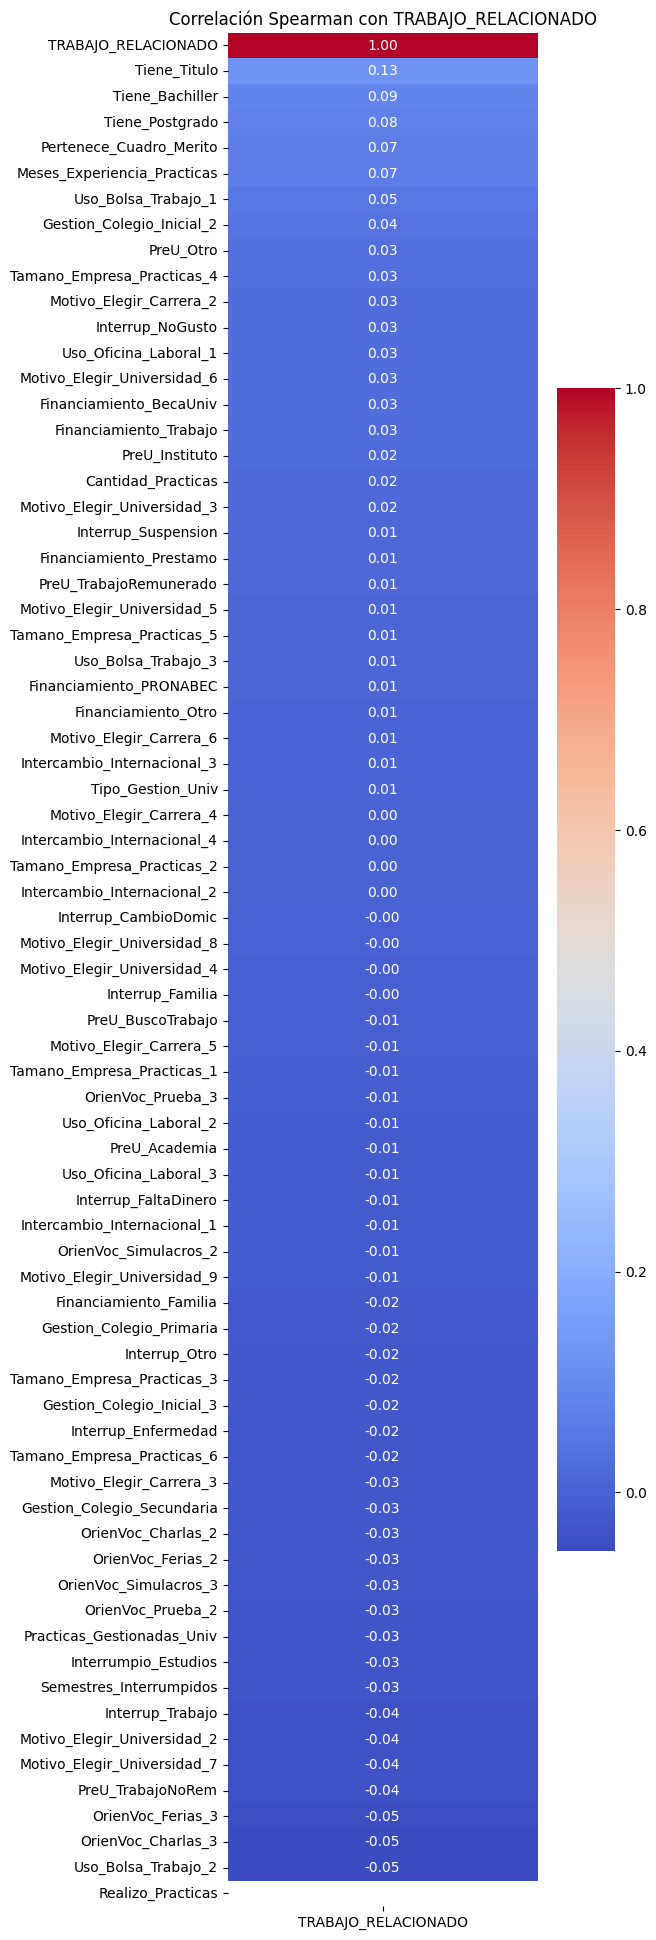

In [120]:
target = 'TRABAJO_RELACIONADO'

predictors = [col for col in df_final.columns if col != target]

corr_target = df_final[predictors + [target]].corr(method='spearman')[target] \
                                              .sort_values(ascending=False)

print(corr_target)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, len(corr_target)/3))
sns.heatmap(corr_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación Spearman con TRABAJO_RELACIONADO")
plt.show()




=== Variables con correlación > |0.04| ===

TRABAJO_RELACIONADO            1.000000
Tiene_Titulo                   0.125934
Tiene_Bachiller                0.086505
Tiene_Postgrado                0.077694
Pertenece_Cuadro_Merito        0.067540
Meses_Experiencia_Practicas    0.066506
Uso_Bolsa_Trabajo_1            0.053427
Gestion_Colegio_Inicial_2      0.043767
OrienVoc_Ferias_3             -0.046320
OrienVoc_Charlas_3            -0.049586
Uso_Bolsa_Trabajo_2           -0.052799
Name: TRABAJO_RELACIONADO, dtype: float64


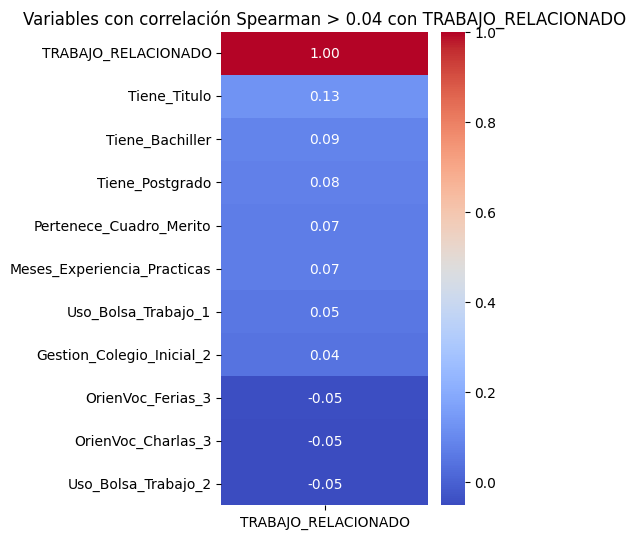

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target = 'TRABAJO_RELACIONADO'

predictors = [col for col in df_final.columns if col != target]

corr_target = df_final[predictors + [target]].corr(method='spearman')[target] \
                                              .sort_values(ascending=False)

# Filtrar por |correlación| > 0.04
corr_filtered = corr_target[abs(corr_target) > 0.04]

print("\n=== Variables con correlación > |0.04| ===\n")
print(corr_filtered)


df_corr_filtered = df_final[corr_filtered.index.tolist() + [target]]


plt.figure(figsize=(5, len(corr_filtered)/2))
sns.heatmap(corr_filtered.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Variables con correlación Spearman > 0.04 con TRABAJO_RELACIONADO")
plt.tight_layout()
plt.show()



In [122]:
target = 'TRABAJO_RELACIONADO'

predictors = [col for col in df_final.columns if col != target]

corr_target = df_final[predictors + [target]].corr(method='spearman')[target] \
                                              .sort_values(ascending=False)

#Filtrar variables con correlación > |0.04|
vars_filtered = corr_target[abs(corr_target) > 0.04].index.tolist()

print("\nVariables que se quedan:")
print(vars_filtered)

df_final = df_final[vars_filtered + [target]]

print("\nNuevo df_final (columnas):")
print(df_final.columns)



Variables que se quedan:
['TRABAJO_RELACIONADO', 'Tiene_Titulo', 'Tiene_Bachiller', 'Tiene_Postgrado', 'Pertenece_Cuadro_Merito', 'Meses_Experiencia_Practicas', 'Uso_Bolsa_Trabajo_1', 'Gestion_Colegio_Inicial_2', 'OrienVoc_Ferias_3', 'OrienVoc_Charlas_3', 'Uso_Bolsa_Trabajo_2']

Nuevo df_final (columnas):
Index(['TRABAJO_RELACIONADO', 'Tiene_Titulo', 'Tiene_Bachiller',
       'Tiene_Postgrado', 'Pertenece_Cuadro_Merito',
       'Meses_Experiencia_Practicas', 'Uso_Bolsa_Trabajo_1',
       'Gestion_Colegio_Inicial_2', 'OrienVoc_Ferias_3', 'OrienVoc_Charlas_3',
       'Uso_Bolsa_Trabajo_2', 'TRABAJO_RELACIONADO'],
      dtype='object')


In [123]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]
print(df_final['TRABAJO_RELACIONADO'].value_counts().sort_index())



TRABAJO_RELACIONADO
0    968
1    952
2    985
Name: count, dtype: int64


In [124]:
df_final.head()

,TRABAJO_RELACIONADO,Tiene_Titulo,Tiene_Bachiller,Tiene_Postgrado,Pertenece_Cuadro_Merito,Meses_Experiencia_Practicas,Uso_Bolsa_Trabajo_1,Gestion_Colegio_Inicial_2,OrienVoc_Ferias_3,OrienVoc_Charlas_3,Uso_Bolsa_Trabajo_2
1688,0,1,1,1,1,24,False,False,False,False,True
2701,0,0,1,0,0,6,False,False,False,False,True
6771,0,0,1,0,1,9,False,False,False,False,True
6531,0,1,1,0,0,12,False,False,False,False,True
2881,0,0,1,0,1,10,False,False,True,True,False


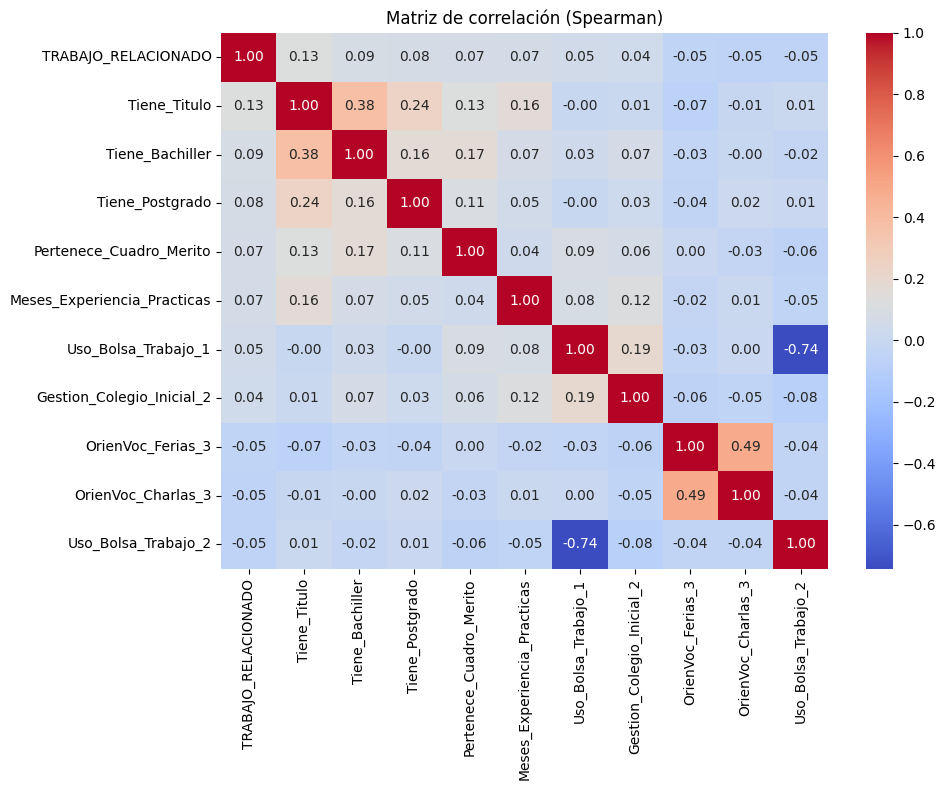

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_final.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (Spearman)")
plt.tight_layout()
plt.show()


In [126]:
# Filtrar columnas numéricas que sí están en df_final
numeric_cols = [col for col in numeric_cols if col in df_final.columns]

# Filtrar columnas categóricas que sí están en df_final
categoric_cols = [col for col in categoric_cols if col in df_final.columns]

print("Columnas numéricas finales:")
print(numeric_cols)

print("\nColumnas categóricas finales:")
print(categoric_cols)


Columnas numéricas finales:
['Meses_Experiencia_Practicas']

Columnas categóricas finales:
['TRABAJO_RELACIONADO', 'Pertenece_Cuadro_Merito', 'Tiene_Bachiller', 'Tiene_Titulo', 'Tiene_Postgrado']


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers


X = df_final.drop(columns=['TRABAJO_RELACIONADO'])
y = df_final['TRABAJO_RELACIONADO']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Escalar las variables numéricas
scaler = StandardScaler()

X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numeric_cols] = scaler.fit_transform(X_train_std[numeric_cols])
X_test_std[numeric_cols] = scaler.transform(X_test_std[numeric_cols])


In [128]:
# --- Columnas finales ---
numeric_cols = ['Meses_Experiencia_Practicas']

categoric_cols = [
    'TRABAJO_RELACIONADO',
    'Pertenece_Cuadro_Merito',
    'Tiene_Bachiller',
    'Tiene_Titulo',
    'Tiene_Postgrado'
]

categoric_cols = [c for c in categoric_cols if c in X_train_std.columns]
numeric_cols   = [c for c in numeric_cols   if c in X_train_std.columns]

X_train_inputs = {}

for col in categoric_cols:
    X_train_inputs[col] = X_train_std[col].astype('int32').values

X_train_inputs['numericas'] = X_train_std[numeric_cols].astype('float32').values

X_test_inputs = {}

for col in categoric_cols:
    X_test_inputs[col] = X_test_std[col].astype('int32').values

X_test_inputs['numericas'] = X_test_std[numeric_cols].astype('float32').values


In [129]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_embedding_mlp(categoric_cols, numeric_cols, df_final):

    inputs = {}
    embeddings = []

    categoric_cols = [c for c in categoric_cols if c in df_final.columns]

    for col in categoric_cols:
        num_classes = df_final[col].nunique()
        emb_dim = min(50, num_classes // 2 + 1)

        inputs[col] = layers.Input(shape=(1,), name=col)

        emb = layers.Embedding(
            input_dim=num_classes + 2,
            output_dim=emb_dim,
            name=f"emb_{col}"
        )(inputs[col])

        emb = layers.Flatten()(emb)
        embeddings.append(emb)

    inputs["numericas"] = layers.Input(
        shape=(len(numeric_cols),),
        name="numericas"
    )

    embeddings.append(inputs["numericas"])

    x = layers.Concatenate()(embeddings)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(32, activation='relu')(x)

    output = layers.Dense(3, activation='softmax')(x)

    model = models.Model(
        inputs=list(inputs.values()),
        outputs=output
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model



In [130]:
model = build_embedding_mlp(categoric_cols, numeric_cols, df_final)
history = model.fit(
    X_train_inputs,
    y_train,
    validation_data=(X_test_inputs, y_test),
    batch_size=32,
    epochs=50
)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.3534 - loss: 1.0974 - val_accuracy: 0.3735 - val_loss: 1.0857
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3695 - loss: 1.0956 - val_accuracy: 0.3752 - val_loss: 1.0839
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3683 - loss: 1.0871 - val_accuracy: 0.4045 - val_loss: 1.0738
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3956 - loss: 1.0922 - val_accuracy: 0.4251 - val_loss: 1.0686
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3948 - loss: 1.0812 - val_accuracy: 0.4131 - val_loss: 1.0625
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3963 - loss: 1.0787 - val_accuracy: 0.4114 - val_loss: 1.0634
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4245 - loss: 1.0711 - val_accuracy: 0.4079 - val_loss: 1.0655
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4166 - loss: 1.0762 - val_accuracy: 0.4269 - va

In [131]:

y_pred_prob = model.predict(X_test_inputs)
y_pred = y_pred_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy final: {acc:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy final: 0.4355


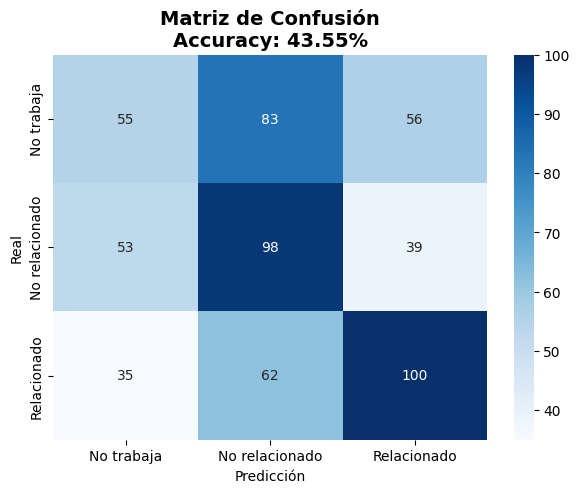

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No trabaja', 'No relacionado', 'Relacionado'],
            yticklabels=['No trabaja', 'No relacionado', 'Relacionado'])

plt.xlabel('Predicción')
plt.ylabel('Real')

plt.title(f'Matriz de Confusión\nAccuracy: {acc:.2%}', fontweight='bold', fontsize=14)

plt.show()

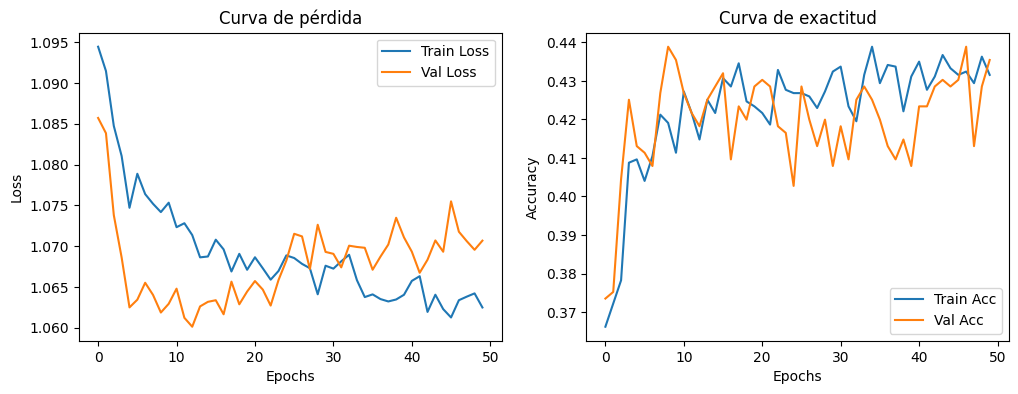

In [133]:
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curva de pérdida')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curva de exactitud')
plt.legend()

plt.show()


Machine Learning Analysis

In [134]:
# Cargar libreriras y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest   # para seleccionar atributos de forma univariada (filtros)
from sklearn.feature_selection import chi2   # estadististica para evaluar la importancia de atributos en relacion al target
from sklearn.feature_selection import RFE    # metodo recursive featute elimination
from sklearn.decomposition import PCA        # para transformacion PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn
from sklearn.svm import SVC   # para modelos SVM

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import jaccard_score  # indice jacard


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LogReg', LogisticRegression(solver='liblinear')))
algos.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
algos.append(('10NN', KNeighborsClassifier(n_neighbors=10)))
algos.append(('CART_none', DecisionTreeClassifier(max_depth=None)))
algos.append(('CART_20', DecisionTreeClassifier(max_depth=20)))
algos.append(('RF', RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)))

results = []
names = []

seed = 42
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {:.4f} ({:.4f})".format(algoname, cv_results.mean(), cv_results.std()))


LogReg: 0.4319 (0.0344)
5NN: 0.3796 (0.0370)
10NN: 0.4019 (0.0348)
CART_none: 0.3998 (0.0458)
CART_20: 0.3979 (0.0468)
RF: 0.4034 (0.0282)


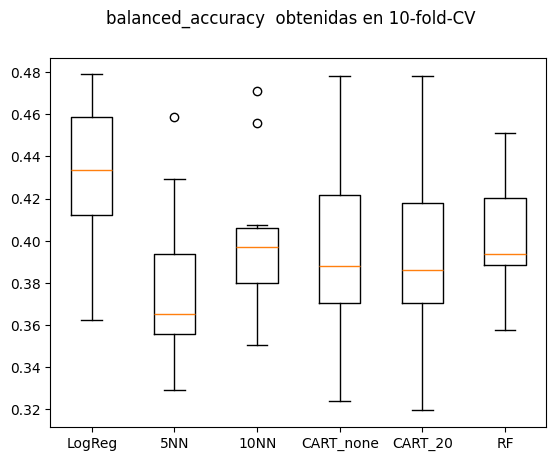

In [136]:

fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

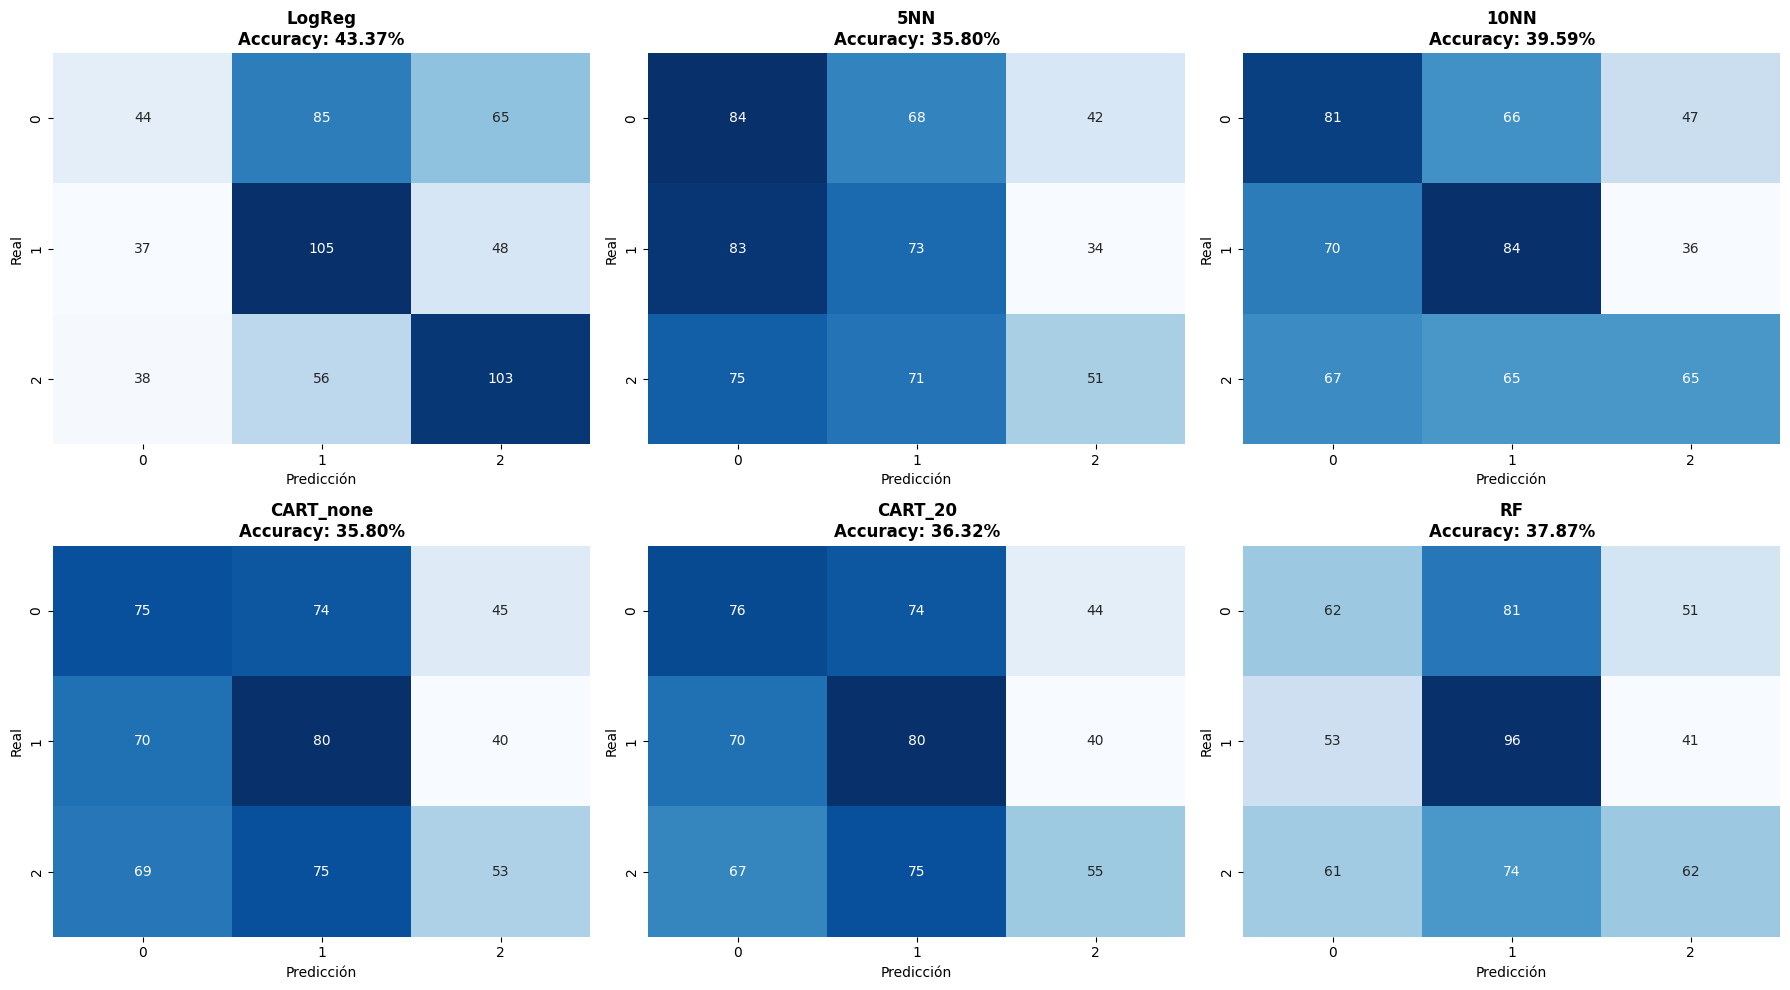

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Iteramos sobre tus algoritmos
for i, (name, model) in enumerate(algos):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)

    axes[i].set_title(f"{name}\nAccuracy: {acc:.2%}", fontweight='bold', fontsize=12)

    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()

Trabaja/No trabaja

In [138]:
# En la columna TRABAJO_RELACIONADO:
#Dejar los 0 como están
# Convertir 1 y 2 en 2
df_final1 = df_final
df_final1['TRABAJO_RELACIONADO'] = df_final1['TRABAJO_RELACIONADO'].replace({2: 1})
df_final1 = df_final.rename(columns={'TRABAJO_RELACIONADO': 'TRABAJA'})



In [139]:
df_final1.head()

,TRABAJA,Tiene_Titulo,Tiene_Bachiller,Tiene_Postgrado,Pertenece_Cuadro_Merito,Meses_Experiencia_Practicas,Uso_Bolsa_Trabajo_1,Gestion_Colegio_Inicial_2,OrienVoc_Ferias_3,OrienVoc_Charlas_3,Uso_Bolsa_Trabajo_2
1688,0,1,1,1,1,24,False,False,False,False,True
2701,0,0,1,0,0,6,False,False,False,False,True
6771,0,0,1,0,1,9,False,False,False,False,True
6531,0,1,1,0,0,12,False,False,False,False,True
2881,0,0,1,0,1,10,False,False,True,True,False



=== Variables con correlación > |0.04| ===

TRABAJA               1.000000
Tiene_Titulo          0.049157
OrienVoc_Ferias_3    -0.056504
OrienVoc_Charlas_3   -0.057706
Name: TRABAJA, dtype: float64


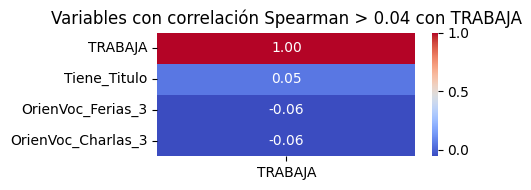

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target = 'TRABAJA'

predictors = [col for col in df_final1.columns if col != target]

corr_target = df_final1[predictors + [target]].corr(method='spearman')[target] \
                                              .sort_values(ascending=False)
corr_filtered = corr_target[abs(corr_target) > 0.04]

print("\n=== Variables con correlación > |0.04| ===\n")
print(corr_filtered)

df_corr_filtered = df_final1[corr_filtered.index.tolist() + [target]]

plt.figure(figsize=(5, len(corr_filtered)/2))
sns.heatmap(corr_filtered.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Variables con correlación Spearman > 0.04 con TRABAJA")
plt.tight_layout()
plt.show()



In [141]:
target = 'TRABAJA'

predictors = [col for col in df_final1.columns if col != target]

corr_series = df_final1[predictors + [target]].corr(method='spearman')[target]

corr_series = corr_series.drop(target)

top_10_vars = corr_series.abs().sort_values(ascending=False).head(10).index.tolist()

print("\nLas 10 variables más importantes:")

print(corr_series[top_10_vars])

df_final1 = df_final1[top_10_vars + [target]]

print("\nNuevo df_final (columnas):")
print(df_final1.columns.tolist())


Las 10 variables más importantes:
OrienVoc_Charlas_3            -0.057706
OrienVoc_Ferias_3             -0.056504
Tiene_Titulo                   0.049157
Uso_Bolsa_Trabajo_2           -0.033410
Tiene_Bachiller                0.033353
Gestion_Colegio_Inicial_2     -0.030818
Tiene_Postgrado                0.024285
Pertenece_Cuadro_Merito        0.013916
Uso_Bolsa_Trabajo_1            0.012564
Meses_Experiencia_Practicas   -0.007031
Name: TRABAJA, dtype: float64

Nuevo df_final (columnas):
['OrienVoc_Charlas_3', 'OrienVoc_Ferias_3', 'Tiene_Titulo', 'Uso_Bolsa_Trabajo_2', 'Tiene_Bachiller', 'Gestion_Colegio_Inicial_2', 'Tiene_Postgrado', 'Pertenece_Cuadro_Merito', 'Uso_Bolsa_Trabajo_1', 'Meses_Experiencia_Practicas', 'TRABAJA']


In [142]:
df_final1 = df_final1.loc[:, ~df_final1.columns.duplicated()]
print(df_final1['TRABAJA'].value_counts().sort_index())

TRABAJA
0     968
1    1937
Name: count, dtype: int64


In [143]:
df_final1.head()

,OrienVoc_Charlas_3,OrienVoc_Ferias_3,Tiene_Titulo,Uso_Bolsa_Trabajo_2,Tiene_Bachiller,Gestion_Colegio_Inicial_2,Tiene_Postgrado,Pertenece_Cuadro_Merito,Uso_Bolsa_Trabajo_1,Meses_Experiencia_Practicas,TRABAJA
1688,False,False,1,True,1,False,1,1,False,24,0
2701,False,False,0,True,1,False,0,0,False,6,0
6771,False,False,0,True,1,False,0,1,False,9,0
6531,False,False,1,True,1,False,0,0,False,12,0
2881,True,True,0,False,1,False,0,1,False,10,0


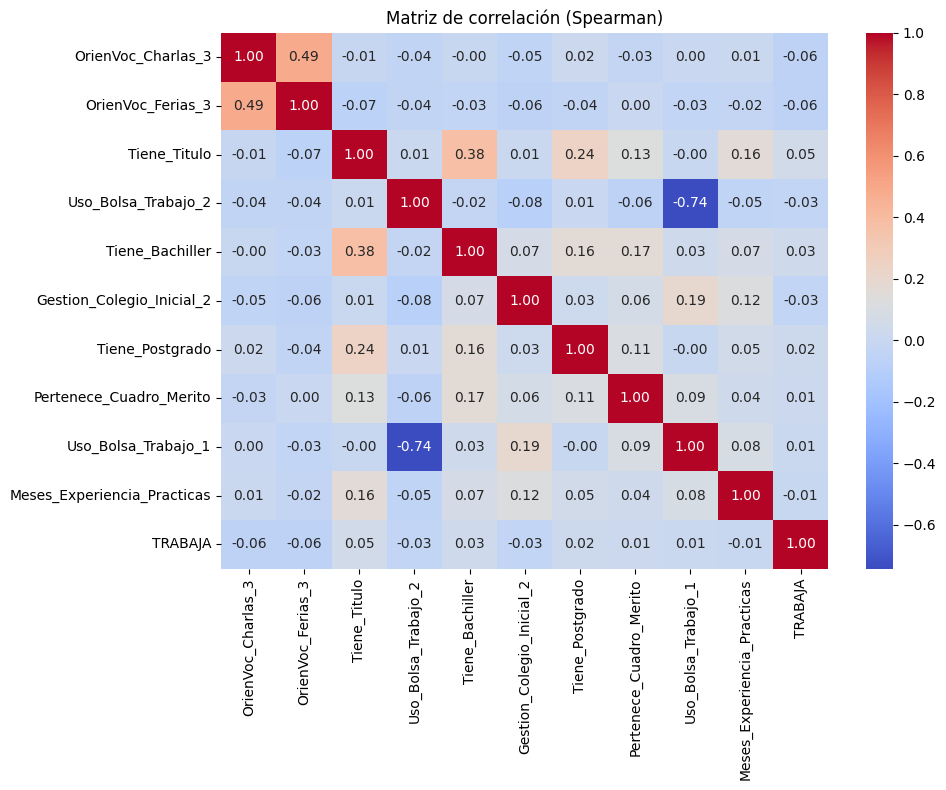

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_final1.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (Spearman)")
plt.tight_layout()
plt.show()


In [145]:

numeric_cols = ['Meses_Experiencia_Practicas']

categoric_cols = [
    'TRABAJA',
    'Pertenece_Cuadro_Merito',
    'Tiene_Bachiller',
    'Tiene_Titulo',
    'Tiene_Postgrado'
]

In [146]:

numeric_cols = [col for col in numeric_cols if col in df_final1.columns]

categoric_cols = [col for col in categoric_cols if col in df_final1.columns]

print("Columnas numéricas finales:")
print(numeric_cols)

print("\nColumnas categóricas finales:")
print(categoric_cols)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

X = df_final1.drop(columns=['TRABAJA'])
y = df_final1['TRABAJA']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()

X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numeric_cols] = scaler.fit_transform(X_train_std[numeric_cols])
X_test_std[numeric_cols] = scaler.transform(X_test_std[numeric_cols])


Columnas numéricas finales:
['Meses_Experiencia_Practicas']

Columnas categóricas finales:
['TRABAJA', 'Pertenece_Cuadro_Merito', 'Tiene_Bachiller', 'Tiene_Titulo', 'Tiene_Postgrado']


In [147]:
numeric_cols = ['Meses_Experiencia_Practicas']

categoric_cols = [
    'TRABAJA',
    'Pertenece_Cuadro_Merito',
    'Tiene_Bachiller',
    'Tiene_Titulo',
    'Tiene_Postgrado'
]

categoric_cols = [c for c in categoric_cols if c in X_train.columns]
numeric_cols   = [c for c in numeric_cols   if c in X_train.columns]


X_train_inputs = {}


for col in categoric_cols:
    X_train_inputs[col] = X_train_std[col].astype('int32').values

X_train_inputs['numericas'] = X_train_std[numeric_cols].astype('float32').values

X_test_inputs = {}

for col in categoric_cols:
    X_test_inputs[col] = X_test_std[col].astype('int32').values

X_test_inputs['numericas'] = X_test_std[numeric_cols].astype('float32').values

In [148]:
import tensorflow as tf
from tensorflow.keras import layers, models


def build_embedding_mlp(categoric_cols, numeric_cols, df_final):
    """
    Construye un MLP con embeddings para variables categóricas
    + variables numéricas concatenadas.
    """

    inputs = {}
    embeddings = []

    categoric_cols = [c for c in categoric_cols if c in df_final.columns]

    for col in categoric_cols:

        num_classes = df_final[col].nunique()
        emb_dim = min(50, num_classes // 2 + 1)

        # Input individual de la columna
        inputs[col] = layers.Input(shape=(1,), name=col)

        emb = layers.Embedding(
            input_dim=num_classes + 2,
            output_dim=emb_dim,
            name=f"emb_{col}"
        )(inputs[col])

        emb = layers.Flatten()(emb)
        embeddings.append(emb)

    inputs["numericas"] = layers.Input(
        shape=(len(numeric_cols),),
        name="numericas"
    )

    embeddings.append(inputs["numericas"])

    x = layers.Concatenate()(embeddings)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(32, activation='relu')(x)


    output = layers.Dense(3, activation='softmax')(x)

    model = models.Model(
        inputs=list(inputs.values()),
        outputs=output
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [150]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model = build_embedding_mlp(categoric_cols, numeric_cols, df_final)

history = model.fit(
    X_train_inputs,
    y_train.values,
    validation_data=(X_test_inputs, y_test.values),
    epochs=150,
    batch_size=32,
    verbose=1
)

loss, accuracy = model.evaluate(X_test_inputs, y_test.values)
print(f"Accuracy final: {accuracy:.4f}")



Epoch 1/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5184 - loss: 0.9466 - val_accuracy: 0.6661 - val_loss: 0.6679
Epoch 2/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6471 - loss: 0.6973 - val_accuracy: 0.6661 - val_loss: 0.6491
Epoch 3/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6582 - loss: 0.6641 - val_accuracy: 0.6661 - val_loss: 0.6495
Epoch 4/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6369 - loss: 0.6639 - val_accuracy: 0.6661 - val_loss: 0.6459
Epoch 5/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6560 - loss: 0.6652 - val_accuracy: 0.6661 - val_loss: 0.6393
Epoch 6/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6547 - loss: 0.6553 - val_accuracy: 0.6661 - val_loss: 0.6380
Epoch 7/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6620 - loss: 0.6480 - val_accuracy: 0.6661 - val_loss: 0.6385
Epoch 8/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6773 - loss: 0.6414 - val_accuracy: 0.6661

In [151]:

y_pred_prob = model.predict(X_test_inputs)
y_pred = y_pred_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy final: {acc:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy final: 0.6661


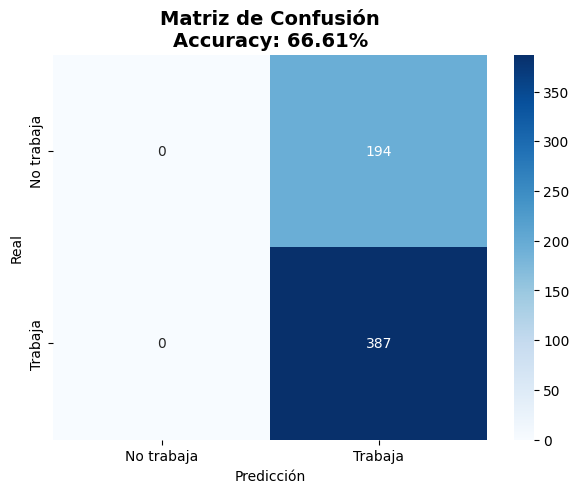

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No trabaja', 'Trabaja'],
            yticklabels=['No trabaja', 'Trabaja'])

plt.xlabel('Predicción')
plt.ylabel('Real')

plt.title(f'Matriz de Confusión\nAccuracy: {acc:.2%}', fontweight='bold', fontsize=14)

plt.show()

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


algos = []
algos.append(('LogReg', LogisticRegression(solver='liblinear')))
algos.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
algos.append(('10NN', KNeighborsClassifier(n_neighbors=10)))
algos.append(('CART_none', DecisionTreeClassifier(max_depth=None)))
algos.append(('CART_20', DecisionTreeClassifier(max_depth=20)))
algos.append(('RF', RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)))

results = []
names = []

seed = 42
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(algoname)
    print("{}: {:.4f} ({:.4f})".format(algoname, cv_results.mean(), cv_results.std()))

LogReg: 0.5011 (0.0062)
5NN: 0.5059 (0.0228)
10NN: 0.5062 (0.0291)
CART_none: 0.5158 (0.0279)
CART_20: 0.5164 (0.0276)
RF: 0.5256 (0.0365)


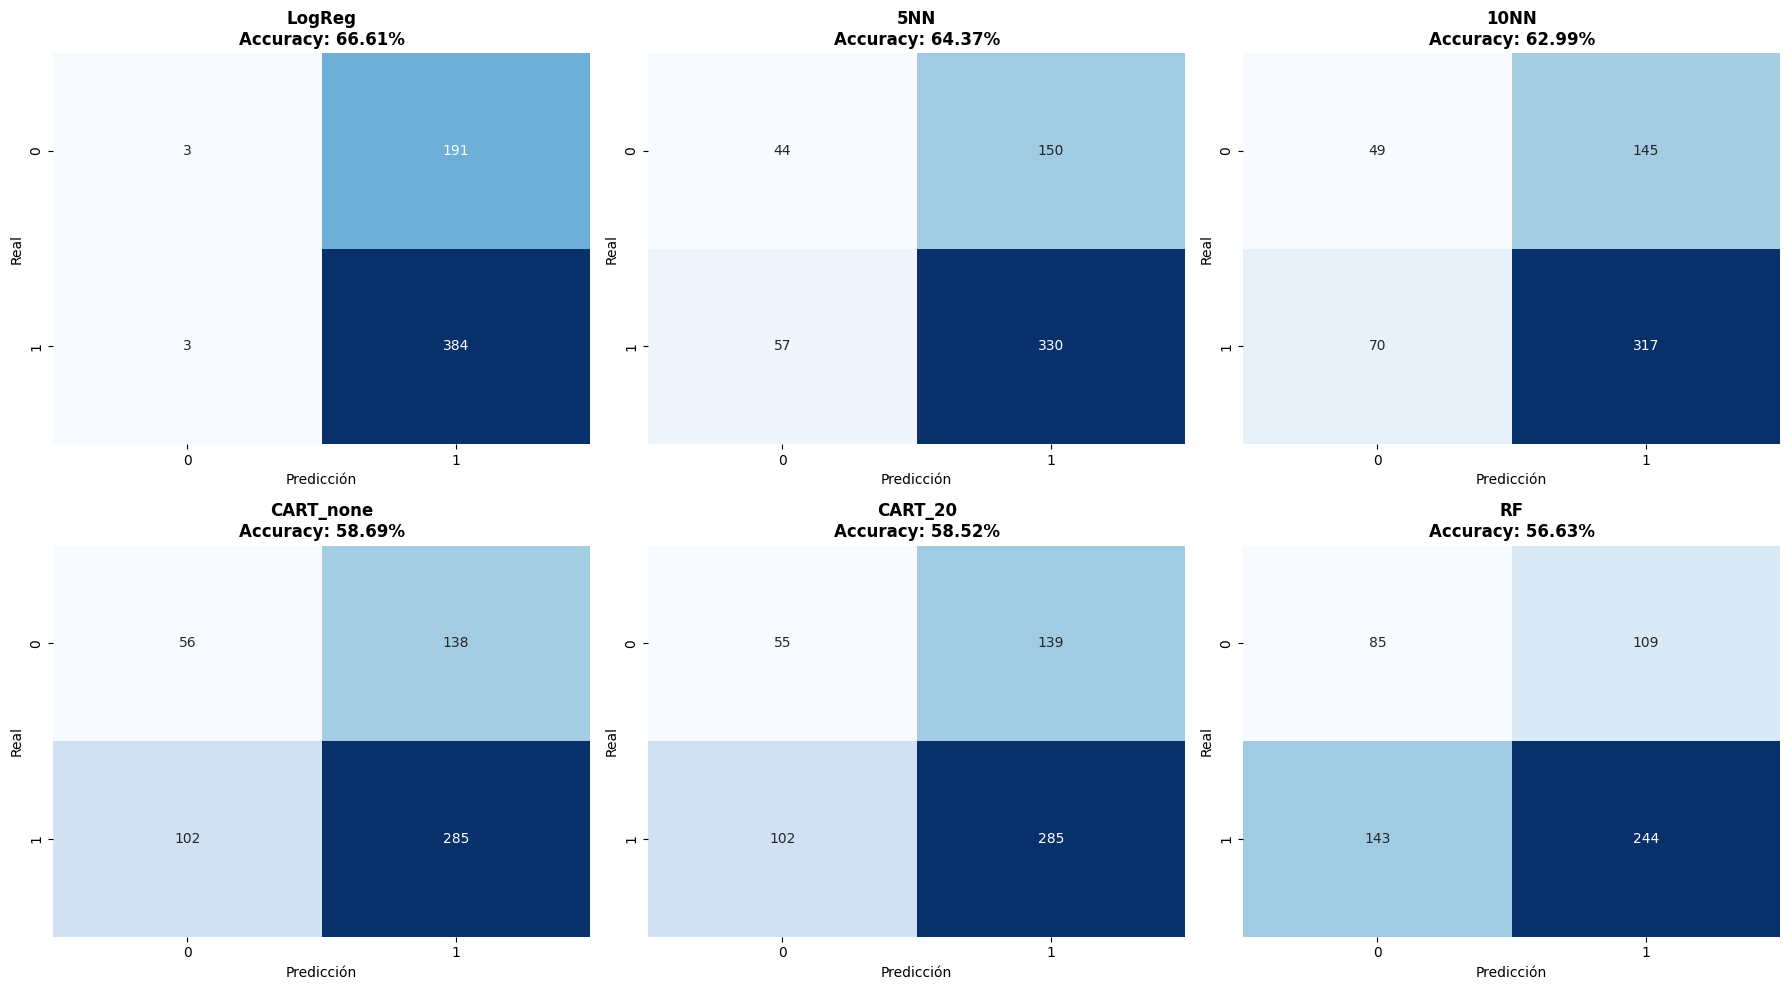

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()


for i, (name, model) in enumerate(algos):


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)


    axes[i].set_title(f"{name}\nAccuracy: {acc:.2%}", fontweight='bold', fontsize=12)

    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Real')


plt.tight_layout()
plt.show()